Install Required Libraries

In [1]:
pip install tensorflow scipy matplotlib


Note: you may need to restart the kernel to use updated packages.


Define the Physics-Informed Neural Network (PINNs)

In [2]:
import tensorflow as tf
import numpy as np

# Define the neural network model
class PINNModel(tf.keras.Model):
    def __init__(self):
        super(PINNModel, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(20, activation='tanh')
        self.hidden_layer2 = tf.keras.layers.Dense(20, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden_layer1(inputs)
        x = self.hidden_layer2(x)
        return self.output_layer(x)

# Loss function that incorporates physical laws (differential equations)
def physics_loss(y_true, y_pred):
    # For simplicity, assume a simple physical equation (could be stress, temperature, etc.)
    return tf.reduce_mean(tf.square(y_pred - y_true))


2024-10-08 01:41:46.962185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 01:41:53.415006: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-10-08 01:41:53.416543: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

Simulate Vehicle Component Data

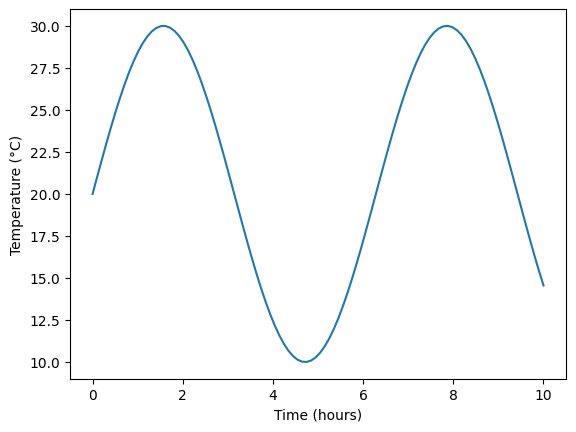

In [3]:
# Simulate some vehicle component data (e.g., temperature over time)
time = np.linspace(0, 10, 100)  # Time from 0 to 10 (e.g., hours of usage)
temperature = 20 + 10 * np.sin(time)  # Simulated temperature data

# Plot the data for visualization
import matplotlib.pyplot as plt
plt.plot(time, temperature)
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.show()


Train the PINN Model

In [4]:
# Convert the data into TensorFlow datasets
dataset = tf.data.Dataset.from_tensor_slices((time.reshape(-1, 1), temperature.reshape(-1, 1)))
dataset = dataset.batch(16)

# Compile and train the PINN model
model = PINNModel()
model.compile(optimizer='adam', loss=physics_loss)

# Train the model
model.fit(dataset, epochs=500)


Epoch 1/500


2024-10-08 01:41:58.615647: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-10-08 01:41:58.616555: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-08 01:41:58.616591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20241007-182550): /proc/driver/nvidia/version does not exist
2024-10-08 01:41:58.620720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

7/7 [==============================] - 1s 3ms/step - loss: 537.1912
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 516.4016
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 496.6071
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 477.5392
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 459.0865
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 441.1649
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 423.7470
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 406.8484
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 390.5179
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 374.8372
Epoch 11/500
7/7 [==============================] - 0s 2ms/step - loss: 359.9165
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 345.8800
Epoch 13/500
7/7 [==============================]

 Evaluate and Predict Failure Time

2/2 [==============================] - 0s 3ms/step


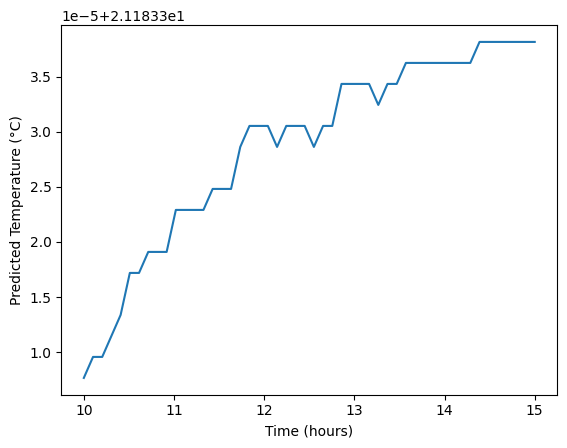

In [5]:
# Predict on new data
new_time = np.linspace(10, 15, 50)  # Predict for the next 5 hours
predicted_temperature = model.predict(new_time.reshape(-1, 1))

# Plot the results
plt.plot(new_time, predicted_temperature)
plt.xlabel('Time (hours)')
plt.ylabel('Predicted Temperature (°C)')
plt.show()
